## Instructions:
### 1. In case of error, just run the cell again. All the codes work but slow internet speed can lead to errors.
### 2. The code doesn't maximize the window.

In [1]:
## Importing Libraries

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException,TimeoutException,StaleElementReferenceException

In [2]:
# Enter the location of your webdriver

location = 'Enter the location of the web driver'
driver = webdriver.Chrome(location)

In [3]:
# Going to instagram login page

driver.get('https://www.instagram.com/')
wait=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.NAME,'password')))

In [4]:
# Function to login using SAMPLE_USERNAME and SAMPLE_PASSWORD

def login(username,password):
    
    name = driver.find_element_by_name('username')
    name.send_keys(username)                       #sending username
    
    password = driver.find_element_by_name('password') 
    password.send_keys(passwd)                     #sending password  
    
    driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[3]/button').click()    #clicking Log-in
    WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,
                                                                   '//*[@id="react-root"]/section/main/div/div/div/div/button')))
    pass

In [5]:
# Fuction to find and list the Instagram Names that appear the after the search
def searchandlist(word,number = 'all'):
    
    ans = []
    #searching word
    driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input').send_keys(word)  
    
    WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.XPATH, '//a[@class="yCE8d  "]/div/div[2]/div/span')))
    elements = driver.find_elements_by_xpath('//a[@class="yCE8d  "]/div/div[2]/div/span')
    
    if number=='all':
        number = len(elements)
    num = number
    for i in elements[:number]:
        word_ = i.get_attribute('innerHTML')
        if word_ == 'food':  # in case food appears in the list we will add the last+1 element instead of this element
            word_ = elements[num].get_attribute('innerHTML')
            ans.append(word_)
            num += 1
            continue
        ans.append(word_)     
    return ans  

In [6]:
def searchandopen(word):
    
    #searching the word
    path = '//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input'
    WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.XPATH,path)))
    driver.find_element_by_xpath(path).send_keys(word)
    WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.CLASS_NAME, "yCE8d  ")))
    driver.find_element_by_class_name("yCE8d  ").click() #selecting the option
    
    pass

In [7]:
def top_5(insta_handles):

    name = []
    numberoffollowers = []
    
    for i in range(len(insta_handles)):
        
        time.sleep(2)

        searchandopen(insta_handles[i])  #searching and opening the handle page
        
        time.sleep(2)
        Numberoffollowers = 0
        try:
            time.sleep(2)
            
            str_num = 0

            path = '//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span'
            
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,path)))
            
            str_num = driver.find_element_by_xpath(path).get_attribute('title')  #getting the number of followers as a string
            
            Numberoffollowers = int(float(''.join((str_num.split(','))))) #converting the above string to number which helps in 
                                                                          #finding the top5
        except TimeoutException:
            Numberoffollowers = 0

        numberoffollowers.append(Numberoffollowers)
        name.append(insta_handles[i])
    
    driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[1]/a/div').click()    #return to home
    # the above step is taken in case the last element has the highest number of followers
    ans = [name[i] for i in np.argsort(-1*np.array(numberoffollowers))] #sorting the handles based on number of followers
    numberoffollowers = [numberoffollowers[i] for i in np.argsort(-1*np.array(numberoffollowers))] 
    return ans[:5],numberoffollowers[:5]

In [8]:
# I have made a single function that scraps everything required in one go.
def info(list_):
    
    number_of_posts = {}
    content_ = {}
    numberoflikes = {}
    avg_likes = {}
    
    months = ['january','february','march','april','may','june', 'july', 'august','september','october','november','december']
    #months are used to check the post date
    
    for i in list_:
        
        content_[i] = []
        numberoflikes[i] = []
        flag = False 
        
        time.sleep(2)
        searchandopen(i) #searching and opening the handle page
        
        time.sleep(2)
        
        path = '//div[contains(@class, "Nnq7C")]//div/a'
        
        
        driver.execute_script('window.scrollBy(0,5000);')
        
        time.sleep(2)
        
        driver.execute_script('window.scrollTo(0,-document.body.scrollHeight);')
        
        WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.XPATH,path)))
        x = driver.find_elements_by_xpath(path)
        n = 0 # count of number of posts in the last 3 days(today, yesterday and day before yesterday)
        k = 1 # count of elements
        for j in x:
            
            time.sleep(2)
            j.click() # opening the post
            
            ### counting the number of posts
            path = '/html/body/div[5]/div[2]/div/article/div[3]/div[2]/a/time'
            WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.XPATH,path)))
            time_ =  driver.find_element_by_xpath(path).get_attribute('innerHTML').split()
            t1 = time_[0]
            t2 = time_[1].lower()
            
            if t1.lower() in months: # the current was posted a while back  
                flag = True 
            elif (int(float(t1))>=3 and t2 == 'days'): # the current post was posted more than 3 days ago
                flag = True                
            else:
                n += 1
                
                
            ### getting the content & the number of likes 
            if k <= 10:
                
                k += 1
                ### getting the content
                path = '/html/body/div[5]/div[2]/div/article/div[3]/div[1]/ul/div/li/div/div/div[2]/span'
                WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.XPATH,path)))
                content_[i].append(driver.find_element_by_xpath(path).text)
                
                ### getting the number of likes
                path = '/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div'
                WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.XPATH,path)))
                num_str, text = driver.find_element_by_xpath(path).text.split()
                
                if text == 'views': # if true, we need to click this element to get the number of likes
                    driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/span').click()
                    num_str = driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/div/div[4]').text.split()[0]
                    driver.find_element_by_xpath("/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/div/div[1]").click()
                    
                numberoflikes[i].append(int(float(''.join((num_str.split(','))))))
                
            
            if flag and k>10: # flag is false until we reach the last post that was posted in the last three days.
                              # We need 10 posts for contents and likes but they may not have been posted in last 3 days 
                              # Also the number of posts in the last three days may be more than 10.
                driver.find_element_by_xpath("//*[name()='svg'][@aria-label='Close']").click()
                break
        
            driver.find_element_by_xpath("//*[name()='svg'][@aria-label='Close']").click()  # closing the post
        
        avg_likes[i] = sum(numberoflikes[i])/10           # avg number of likes
        number_of_posts[i] = n                          # number of posts
        
    return number_of_posts,content_,numberoflikes,avg_likes

In [9]:
# Enter your username and password

username = 'SAMPLE_USERNAME'
passwd = 'SAMPLE_PASSWORD'
login(username,passwd)

In [10]:
# Dismissing the early notifications
# Comment out if no such early notifications popup 

driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/div/div/div/button').click()
WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.CLASS_NAME, "HoLwm")))
driver.find_element_by_class_name('HoLwm').click()

In [11]:
# Enter the word to search

word = 'food'
top10 = searchandlist(word,10)

In [12]:
top10

['foodnetwork',
 'food_for_tee',
 'manoharfoods',
 'food52',
 'best_foody1',
 'sailusfood',
 'foodsandflavoursbyshilpi',
 'food.darzee',
 'yourfoodlab',
 'food.khana']

In [13]:
# Clearing the search box

driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[2]').click()

# Question 1
## 1.Top 5 Instagram Handle

In [14]:
top5,followers = top_5(top10)
for i in range(5):
    print('The {} has {} followers'.format(top5[i],followers[i]))

The foodnetwork has 10992503 followers
The food52 has 3004364 followers
The yourfoodlab has 1550338 followers
The food.darzee has 88834 followers
The sailusfood has 59124 followers


## 2.Number of posts in the previous 3 days

In [15]:
number_of_posts,content_,numberoflikes,avg_likes = info(top5)

In [16]:
for i in number_of_posts.keys():
    print('Instagram Handle {} has posted {} times in last three days'.format(i,number_of_posts[i]))

Instagram Handle foodnetwork has posted 12 times in last three days
Instagram Handle food52 has posted 11 times in last three days
Instagram Handle yourfoodlab has posted 3 times in last three days
Instagram Handle food.darzee has posted 3 times in last three days
Instagram Handle sailusfood has posted 0 times in last three days


## 3.Graph

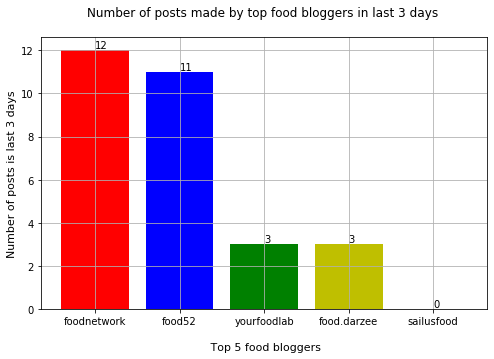

In [17]:
x = [1,2,3,4,5]
y = [i for i in number_of_posts.values() ]
plt.figure(figsize=(8,5))
plt.bar(x,y,color = 'rbgyc')
plt.grid()
for i in range(len(x)):
    plt.text(x[i],y[i]+0.1,y[i])
plt.xticks(x,number_of_posts.keys())#,rotation=45)
plt.xlabel('\n Top 5 food bloggers',fontsize = 11)
plt.ylabel('Number of posts is last 3 days',fontsize = 11)
plt.title('Number of posts made by top food bloggers in last 3 days \n',fontsize = 12)
plt.show()

# Question 2
## 1.Scrapping the first 10 posts of  the above handles

In [18]:
for i in content_.keys():
    print(content_[i])
    print()
    print('___________________________________________________________________________________________________________',end='\n')
    print()

['Fight for the Deep-Fryer (w/ @ManeetChauhan & @ChefMarcMurphy)\n\nManeet and Marc battle it out for the deep-fryer in the next round of the #Chopped Grudge Match tournament!\n\nThe competition continues TONIGHT at 9|8c.', "What could make baby ravioli even cuter? Pink sauce... duh! 💖 \u2060\n\u2060\nClick the link in our bio to subscribe to @discoveryplus to stream more #GiadaEntertains and much more. #discoveryplus\u2060\n\u2060\nFind the recipe for @GiadaDeLaurentiis' Cheese Ravioletti in Pink Sauce on FoodNetwork.com!", 'Lasagna is our love language — ESPECIALLY when pesto is involved! 💚\n. . .\nSearch for "Pesto Lasagna Rolls" on FoodNetwork.com for the recipe!', 'You heard it first! @InaGarten and @MelissaMcCarthy are joining forces for an exciting @discoveryplus special! Join them for cocktails and a unique 1-on-1 conversation fueled by questions submitted by YOU, the fans! Head to Ina and Melissa’s profiles now to send in your questions.', 'Recipe of the Day: Jumbo Cheesy Ital

## 2.List of all words and their frequency

In [19]:
## combining all the strings in content
a = ''
for i in content_.keys():
    for j in content_[i]:
        a = a + ''.join(content_[i])

In [20]:
## for the purposes of this question I have considered only hashtags
## at the end I do have cell that can calculate the same for all the words 
##Its commented out because it serves no purpose and does not provide much information.
hash_ = {}
for i in a.split():

    if i[0] == '#': 
        for j in i.split('#'): # to check if there are multiple hastags
            if  len(j) != 0: # to remove empty strings
                if j in hash_.keys():
                    hash_[j] += 1
                else:
                    hash_[j] = 1 

In [21]:
x = np.argsort(np.array(hash_.values()))

index = np.argsort(-np.array(list(hash_.values())))  #getting the index of the sorted frequency

hashtag = []
hashtag_val = []

for i in index:
    hashtag.append(list(hash_.keys())[i])
    hashtag_val.append(list(hash_.values())[i])
    print(list(hash_.keys())[i],'-------------',list(hash_.values())[i])

indianfood ------------- 120
comfortfood ------------- 120
sailusfood ------------- 100
walkwithindia ------------- 90
yummyinmytummy ------------- 80
soulfood ------------- 80
foodporn ------------- 80
foodtalkindia ------------- 70
streetfood ------------- 70
ndtv_food ------------- 60
recipeoftheday ------------- 50
breakfastofchamps ------------- 50
goodfoodindia ------------- 50
wearehereforyou ------------- 50
foodstagram ------------- 50
northindianfood ------------- 50
southindianfood ------------- 50
thefeedfeed ------------- 50
healthy2021 ------------- 40
food ------------- 40
breakfastlover ------------- 40
veganfoodshare ------------- 40
southindianbreakfast ------------- 40
healthyfood ------------- 40
huffposttaste ------------- 40
breakfastoftheday ------------- 40
recipe ------------- 40
foodie ------------- 40
eattherainbow ------------- 40
vegetarianfoodshare ------------- 30
whatiate ------------- 30
onmytable ------------- 30
breakfastclub ------------- 30
foodblog

## 3.Saving the words and their frequency

In [22]:
df = pd.DataFrame()
df['Hashtag Word'] = list(hash_.keys())
df['Frequency'] = list(hash_.values())
df = df.set_index('Hashtag Word',drop=True)
df.to_csv('Words.csv')

## 4.Top 5 hashtags

In [23]:
top5_hashtags = hashtag[:5]
top5_hashtags_values = hashtag_val[:5]
for i in range(5):
    print('{}:{}'.format(top5_hashtags[i],top5_hashtags_values[i]))

indianfood:120
comfortfood:120
sailusfood:100
walkwithindia:90
yummyinmytummy:80


## 5. Pie Chart for the top 5 hashtags

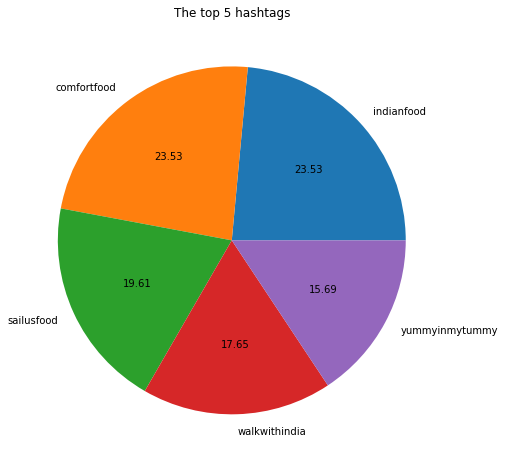

In [24]:
plt.figure(figsize=(8, 8))
plt.pie(top5_hashtags_values,labels=top5_hashtags,autopct='%.2f')
plt.title('The top 5 hashtags')
plt.show()

# Question 3
## 1. The number of likes on the last 10 posts

In [25]:
for i in numberoflikes.keys():
    print('{} handle has the following number of likes on the last 10 posts:'.format(i), end = '')
    print(*numberoflikes[i])
    print()

foodnetwork handle has the following number of likes on the last 10 posts:35 3313 20793 3018 10039 3375 2774 38780 12412 8469

food52 handle has the following number of likes on the last 10 posts:13110 3093 22346 2244 11110 2796 15407 12618 4104 2669

yourfoodlab handle has the following number of likes on the last 10 posts:34514 23456 42824 54682 25344 33293 26152 39387 25984 30207

food.darzee handle has the following number of likes on the last 10 posts:88 211 133 164 105 146 1445 293 64 175

sailusfood handle has the following number of likes on the last 10 posts:3286 2592 2506 4383 3258 2272 1903 2364 1669 1719



## 2.Average Number of likes of the handles

In [26]:
for i in avg_likes.keys():
    print('{} handle has an average of {} likes on a post'.format(i,avg_likes[i]))

foodnetwork handle has an average of 10300.8 likes on a post
food52 handle has an average of 8949.7 likes on a post
yourfoodlab handle has an average of 33584.3 likes on a post
food.darzee handle has an average of 282.4 likes on a post
sailusfood handle has an average of 2595.2 likes on a post


## 3.Average followers to average likes for each handle

In [27]:
avg_likes_ = np.array(list(avg_likes.values()))
followers = np.array(followers)
like_ratio = np.round(followers/avg_likes_,2)
for i in range(5):
    print('{} handle has a like ratio of {}'.format(list(avg_likes.keys())[i],avg_likes_[i]))

foodnetwork handle has a like ratio of 10300.8
food52 handle has a like ratio of 8949.7
yourfoodlab handle has a like ratio of 33584.3
food.darzee handle has a like ratio of 282.4
sailusfood handle has a like ratio of 2595.2


## 4.Bar graph showing the like ratio for each handle

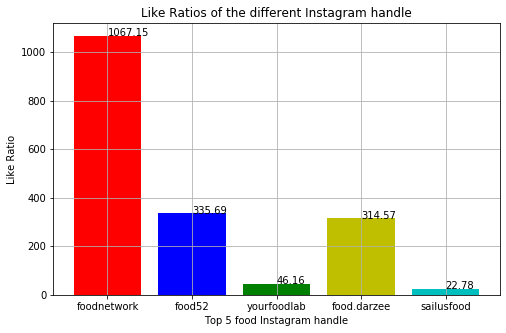

In [28]:
x = [1,2,3,4,5]
y = like_ratio
plt.figure(figsize=(8,5))
plt.bar(x,y,color = 'rbgyc')
plt.grid()
for i in range(len(x)):
    plt.text(x[i],y[i]+0.1,y[i])
plt.xticks(x,avg_likes.keys())
plt.xlabel('Top 5 food Instagram handle')
plt.ylabel('Like Ratio')
plt.title('Like Ratios of the different Instagram handle')
plt.show()

## Earlier Codes.
## Separate functions for different parts of the question

In [30]:
# code to find the list of words

#from nltk.corpus import stopwords
#import string
#stop = stopwords.words('english')
#puncutations = string.punctuation
#stop = stop + list(puncutations)

#dict_ = {}
#list_ = []
#
#for i in a.split():
#    if i.lower() not in stop:
#        if i in dict_.keys():
#            dict_[i] += 1
#        else:
#            dict_[i] = 1
#            list_.append(i)
#
#x = np.argsort(np.array(dict_.values()))
#
#index = np.argsort(-np.array(list(dict_.values())))
#
#word = []
#word_val = []
#
#for i in index:
#    word.append(list(dict_.keys())[i])
#    word_val.append(list(dict_.values())[i])
#    print(list(dict_.keys())[i],'-------------',list(dict_.values())[i])

#top5_words = hashtag[:5]
#top5_words_values = hashtag_val[:5]

#plt.figure(figsize=(8, 8))
#plt.pie(top5_words_values,labels=top5_words,autopct='%.2f')
#plt.show()

In [31]:
#def numberofposts(list_):
#    
#    ans = {}
#    
#    months = ['January','February','March','April','May','June', 'July', 'August','September','October','November','December']
#    for i in list_:
#        time.sleep(2)
#        searchandopen(i)
#        path = '//div[contains(@class, "Nnq7C")]//div/a'
#        WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.XPATH,path)))
#
#        x = driver.find_elements_by_xpath(path)
#        n = 0
#        for j in x:
#            time.sleep(2)
#            j.click()
#           
#            path = '/html/body/div[5]/div[2]/div/article/div[3]/div[2]/a/time'
#            WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.XPATH,path)))
#            time_ =  driver.find_element_by_xpath(path).get_attribute('innerHTML').split()
#
#            if (time_[0] >= '3' and time_[1] in ['days','day']) or (time_[0] in months):
#                driver.find_element_by_xpath("//*[name()='svg'][@aria-label='Close']").click()
#                break
#            else:
#                n += 1
#                driver.find_element_by_xpath("//*[name()='svg'][@aria-label='Close']").click()
#        ans[i] = n   
#    
#    return ans

In [32]:
#def content(list_):
#    
#    ans = {}
#    
#    for i in list_:
#        ans[i] = []
#        searchandopen(i)
#        path = '//div[contains(@class, "Nnq7C")]//div/a'
#        WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.XPATH,path)))
#        x = driver.find_elements_by_xpath(path)[:10]
#        n = 0
#        for j in x:
#            j.click()
#            path = '/html/body/div[5]/div[2]/div/article/div[3]/div[1]/ul/div/li/div/div/div[2]/span'
#            WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.XPATH,path)))
#            ans[i].append(driver.find_element_by_xpath(path).text)
#            WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.XPATH,"//*[name()='svg'][@aria-label='Close']")))
#            driver.find_element_by_xpath("//*[name()='svg'][@aria-label='Close']").click()
#   
#    return ans

In [33]:
#def number_likes(list_):
#    
#    ans = {}
#    avg = {}
#    for i in list_:
#        ans[i] = []
#        searchandopen(i)
#        time.sleep(2)
#        path = '//div[contains(@class, "Nnq7C")]//div/a'
#        WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.XPATH,path)))
#        x = driver.find_elements_by_xpath(path)[:10]
#        n = 0
#        for j in x:
#            time.sleep(2)
#            j.click()
#            path = '/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div'
#            WebDriverWait(driver, 30).until(EC.presence_of_element_located((By.XPATH,path)))
#            num_str, text = driver.find_element_by_xpath(path).text.split()
#            if text == 'views':
#                driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/span').click()
#                num_str = driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/div/div[4]').text.split()[0]
#                driver.find_element_by_xpath("/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/div/div[1]").click()
#            driver.find_element_by_xpath("/html/body/div[5]/div[3]/button").click()
#            ans[i].append(int(float(''.join((num_str.split(','))))))
#        avg[i] = sum(ans[i])/10
#    return ans,avg